In [1]:
import pandas as pd
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/kosh_dp_2019-11-21.csv')

In [3]:
df = pd.DataFrame()
df['ds'] = pd.to_datetime(data['created_time'])
df['y'] = data['likes']

In [4]:
cap = 200000
floor = 0
df['cap'] = cap
df['floor'] = floor

In [5]:
df.head()

,ds,y,cap,floor
0,2019-11-15 14:49:13,81554,200000,0
1,2019-11-15 09:50:24,75948,200000,0
2,2019-11-01 21:34:17,61475,200000,0
3,2019-10-29 10:46:55,118276,200000,0
4,2019-10-26 10:42:50,78847,200000,0


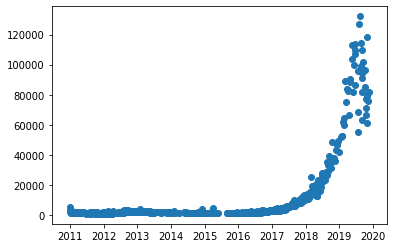

In [6]:
plt.scatter(x=df.ds, y=df.y)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


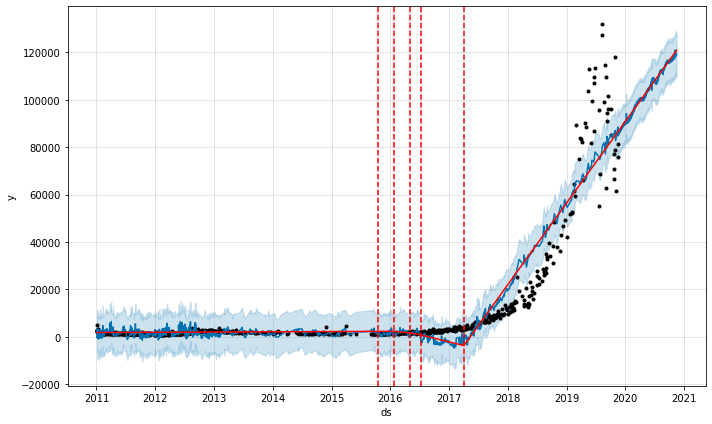

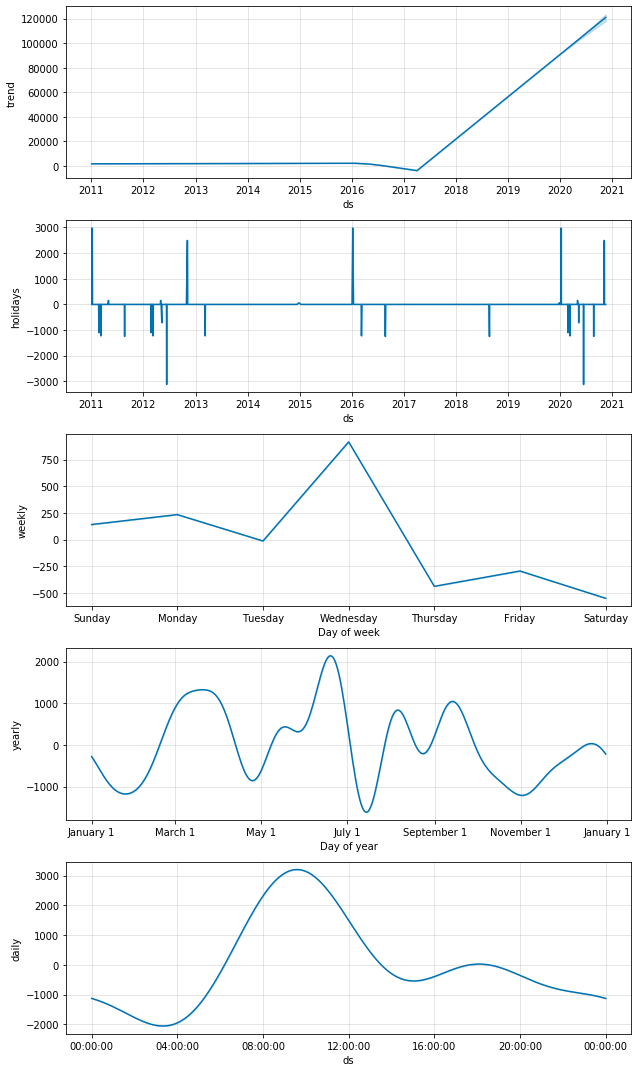

INFO:fbprophet:Making 12 forecasts with cutoffs between 2013-06-14 14:49:13 and 2018-11-15 14:49:13


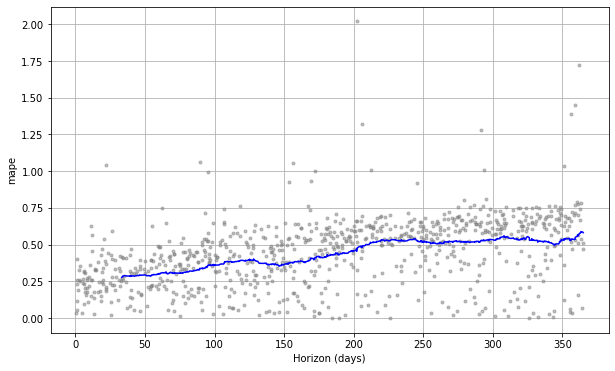

mape: 44.44%


In [7]:
prophet = Prophet()
prophet.add_country_holidays(country_name='RU')
prophet.fit(df)
future = prophet.make_future_dataframe(periods=365, freq='D')
forecast = prophet.predict(future)
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)
plt.show()
fig2 = prophet.plot_components(forecast)
plt.show()
df_cv = cross_validation(prophet, initial='730 days', period='180 days', horizon = '365 days')
df_p = performance_metrics(df_cv)
fig = plot_cross_validation_metric(df_cv, metric='mape')
plt.show()
print('mape:', '{:.2f}%'.format(100 * df_p['mape'].mean()))

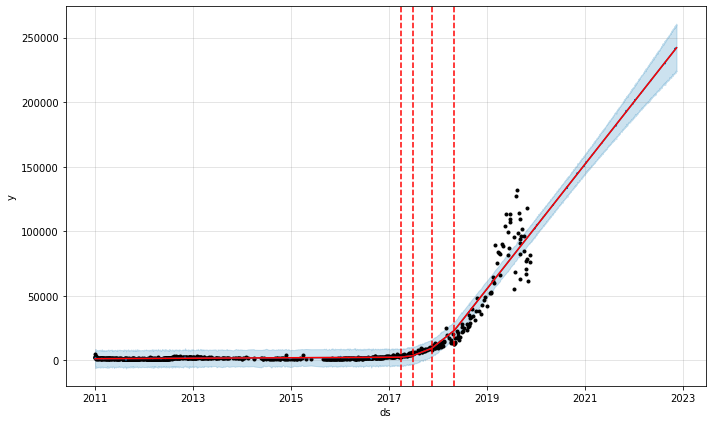

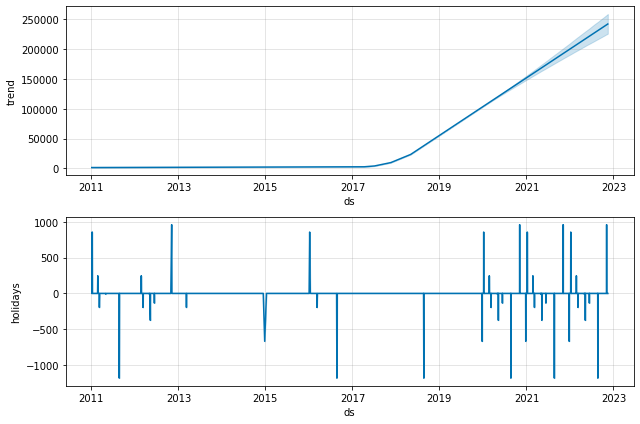

INFO:fbprophet:Making 12 forecasts with cutoffs between 2013-06-14 14:49:13 and 2018-11-15 14:49:13


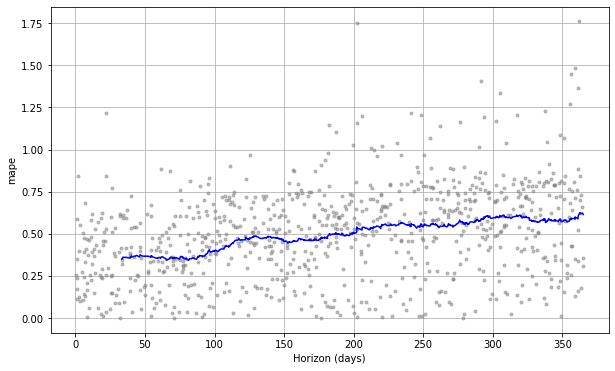

mape: 49.88%


In [8]:
prophet = Prophet(growth='linear',
                  n_changepoints=25,
                  changepoint_range=0.95,
                  yearly_seasonality=False,
                  weekly_seasonality=False,
                  daily_seasonality=False,
                  holidays=None,
                  seasonality_mode='additive',
                  seasonality_prior_scale=10,
                  holidays_prior_scale=10,
                  changepoint_prior_scale=.01,
                  mcmc_samples=0)
prophet.add_country_holidays(country_name='RU')
prophet.fit(df)
future = prophet.make_future_dataframe(periods=1095, freq='D')
forecast = prophet.predict(future)
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)
plt.show()
fig2 = prophet.plot_components(forecast)
plt.show()
df_cv = cross_validation(prophet, initial='730 days', period='180 days', horizon = '365 days')
df_p = performance_metrics(df_cv)
fig = plot_cross_validation_metric(df_cv, metric='mape')
plt.show()
print('mape:', '{:.2f}%'.format(100 * df_p['mape'].mean()))

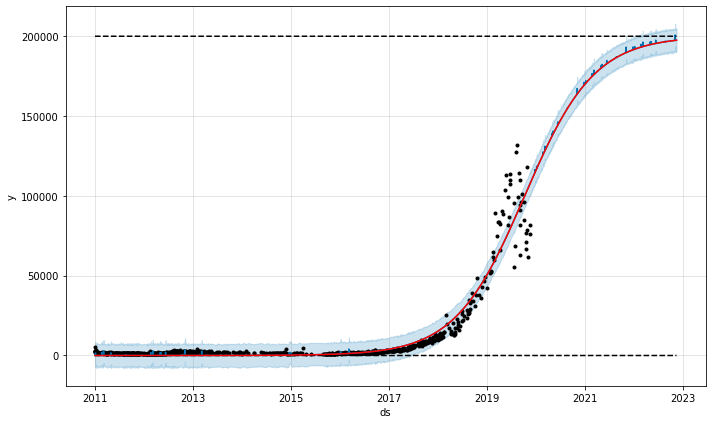

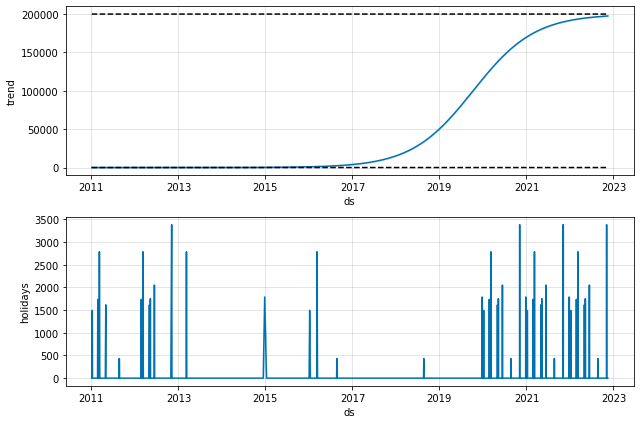

INFO:fbprophet:Making 6 forecasts with cutoffs between 2014-05-30 14:49:13 and 2016-11-15 14:49:13


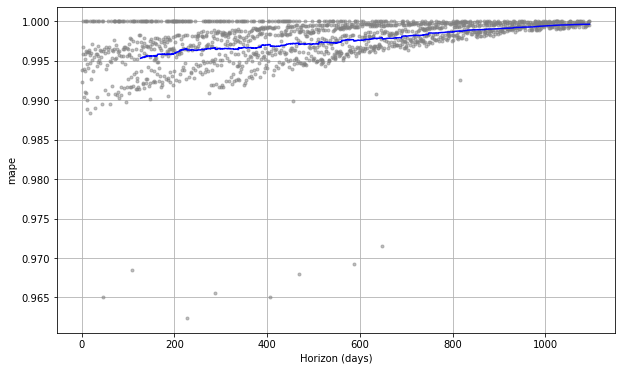

mape: 99.77%


In [9]:
prophet = Prophet(growth='logistic',
                  n_changepoints=25,
                  changepoint_range=0.95,
                  yearly_seasonality=False,
                  weekly_seasonality=False,
                  daily_seasonality=False,
                  holidays=None,
                  seasonality_mode='additive',
                  seasonality_prior_scale=10,
                  holidays_prior_scale=10,
                  changepoint_prior_scale=.01,
                  mcmc_samples=0)
prophet.add_country_holidays(country_name='RU')
prophet.fit(df)
future = prophet.make_future_dataframe(periods=1095, freq='D')
future['cap'] = cap
future['floor'] = floor
forecast = prophet.predict(future)
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)
plt.show()
fig2 = prophet.plot_components(forecast)
plt.show()
df_cv = cross_validation(prophet, initial='1095 days', period='180 days', horizon = '1095 days')
df_p = performance_metrics(df_cv)
fig = plot_cross_validation_metric(df_cv, metric='mape')
plt.show()
print('mape:', '{:.2f}%'.format(100 * df_p['mape'].mean()))

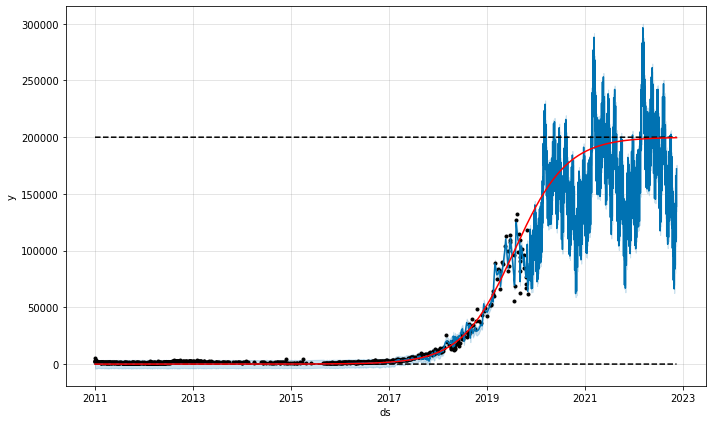

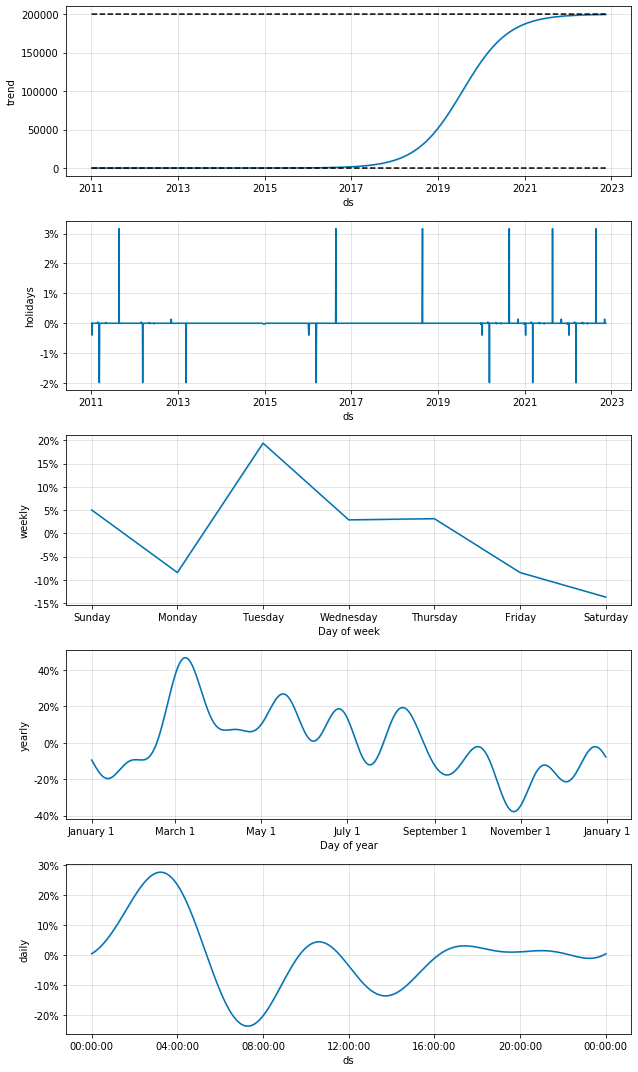

INFO:fbprophet:Making 6 forecasts with cutoffs between 2014-05-30 14:49:13 and 2016-11-15 14:49:13


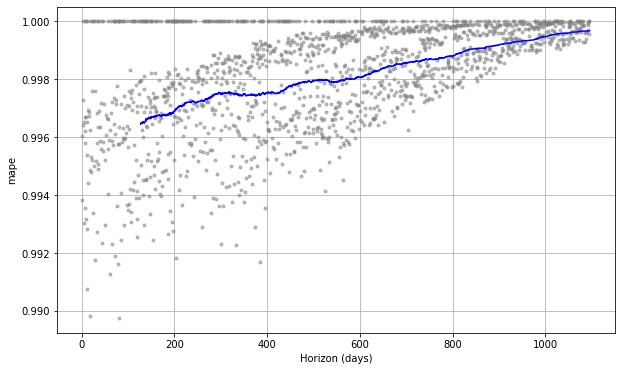

mape: 99.82%


In [10]:
prophet = Prophet(growth='logistic',
                  n_changepoints=25,
                  changepoint_range=0.95,
                  yearly_seasonality=True,
                  weekly_seasonality=True,
                  daily_seasonality=True,
                  holidays=None,
                  seasonality_mode='multiplicative',
                  seasonality_prior_scale=10,
                  holidays_prior_scale=10,
                  changepoint_prior_scale=.01,
                  mcmc_samples=0)
prophet.add_country_holidays(country_name='RU')
prophet.fit(df)
future = prophet.make_future_dataframe(periods=1095, freq='D')
future['cap'] = cap
future['floor'] = floor
forecast = prophet.predict(future)
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)
plt.show()
fig2 = prophet.plot_components(forecast)
plt.show()
df_cv = cross_validation(prophet, initial='1095 days', period='180 days', horizon = '1095 days')
df_p = performance_metrics(df_cv)
fig = plot_cross_validation_metric(df_cv, metric='mape')
plt.show()
print('mape:', '{:.2f}%'.format(100 * df_p['mape'].mean()))

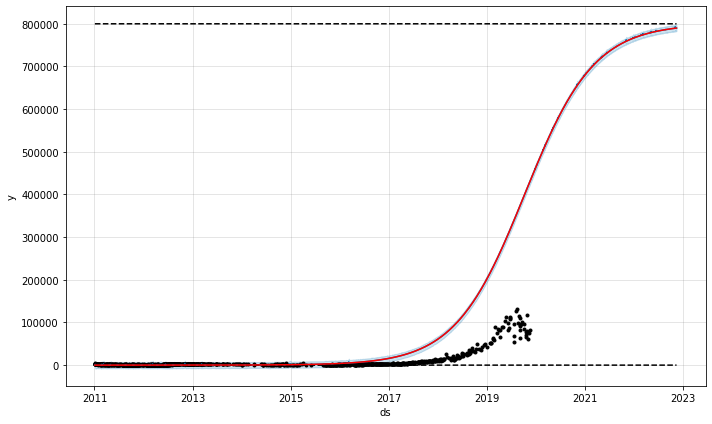

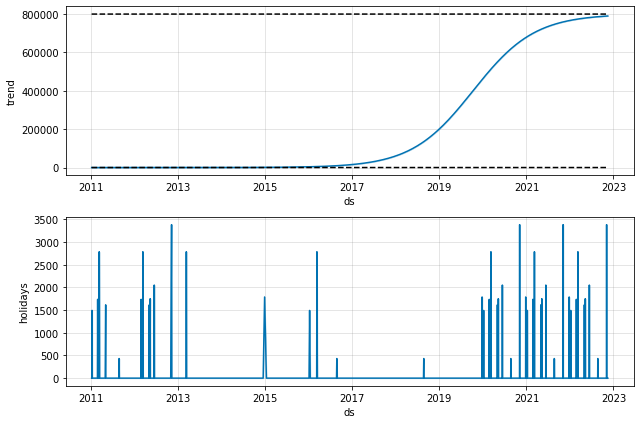

INFO:fbprophet:Making 6 forecasts with cutoffs between 2014-05-30 14:49:13 and 2016-11-15 14:49:13


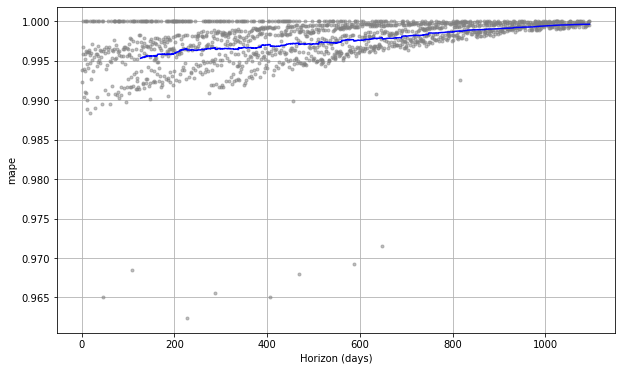

mape: 99.77%


In [11]:
prophet = Prophet(growth='logistic',
                  n_changepoints=25,
                  changepoint_range=0.95,
                  yearly_seasonality=False,
                  weekly_seasonality=False,
                  daily_seasonality=False,
                  holidays=None,
                  seasonality_mode='additive',
                  seasonality_prior_scale=10,
                  holidays_prior_scale=10,
                  changepoint_prior_scale=.01,
                  mcmc_samples=0)
prophet.add_country_holidays(country_name='RU')
prophet.fit(df)
future = prophet.make_future_dataframe(periods=1095, freq='D')
future['cap'] = 800000
future['floor'] = floor
forecast = prophet.predict(future)
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)
plt.show()
fig2 = prophet.plot_components(forecast)
plt.show()
df_cv = cross_validation(prophet, initial='1095 days', period='180 days', horizon = '1095 days')
df_p = performance_metrics(df_cv)
fig = plot_cross_validation_metric(df_cv, metric='mape')
plt.show()
print('mape:', '{:.2f}%'.format(100 * df_p['mape'].mean()))